<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/01/PTE_DL1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 1. gyakorlat: bevezetés, tensorflow alapok
### 2022. szeptrember 7.

Javasolt python anyag:
https://oroszl.web.elte.hu/szamprob/static_notebooks/Package03/mintapelda03.html

In [1]:
import numpy as np

# És kapu megvalósítása

def AND(x1, x2):            # függvény definiálása két paramétert vesz át x1 és x2
    x = np.array([x1, x2])  # Az átvett értékeket egy numpy tömbbe másolja
    w = np.array([0.5, 0.5])# súlytényezők beállítása
    b = -0.7                # bias beállítása
    tmp = np.sum(w*x) + b   # a neuron összegzi a bemenetet
    if tmp <= 0:            # aktivációs függvény 
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]: # ciklus futtatása a lehetséges bemeneti értékekkel egy listából
    y = AND(xs[0], xs[1])                   # az AND fügvény meghívása
    print(str(xs) + " -> " + str(y))        # az eredmény kinyomtatása képernyőre str fügvény a hasában lévő objektumot str-re konvertálja

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [2]:
def NAND(x1, x2):           # Nand kapu megvalósítása
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [3]:
def OR(x1, x2):             # Vagy kapu megvalósítása
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


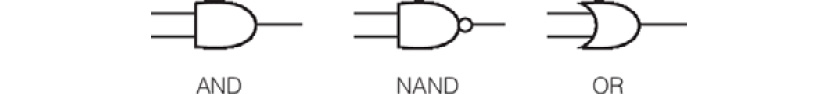

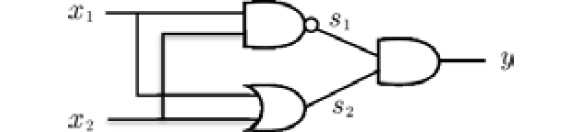

In [4]:
def XOR(x1, x2):          # XOR kapu megvalósítása (kizáró vagy)
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


##Tensorflow

In [5]:
!nvidia-smi

Wed Sep  7 09:54:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [7]:
# beállítások a tréninghez
EPOCHS = 50 # korszakok száma
BATCH_SIZE = 128 
VERBOSE = 1 # lássuk az edzés adatait
NB_CLASSES = 10   # kimenetek száma
#N_HIDDEN = 128 


In [8]:
# MNIST dataset letöltése
# verify
# the split between train and test is 60,000, and 10,000 respectly 

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##Adatok átnézése

Populating the interactive namespace from numpy and matplotlib


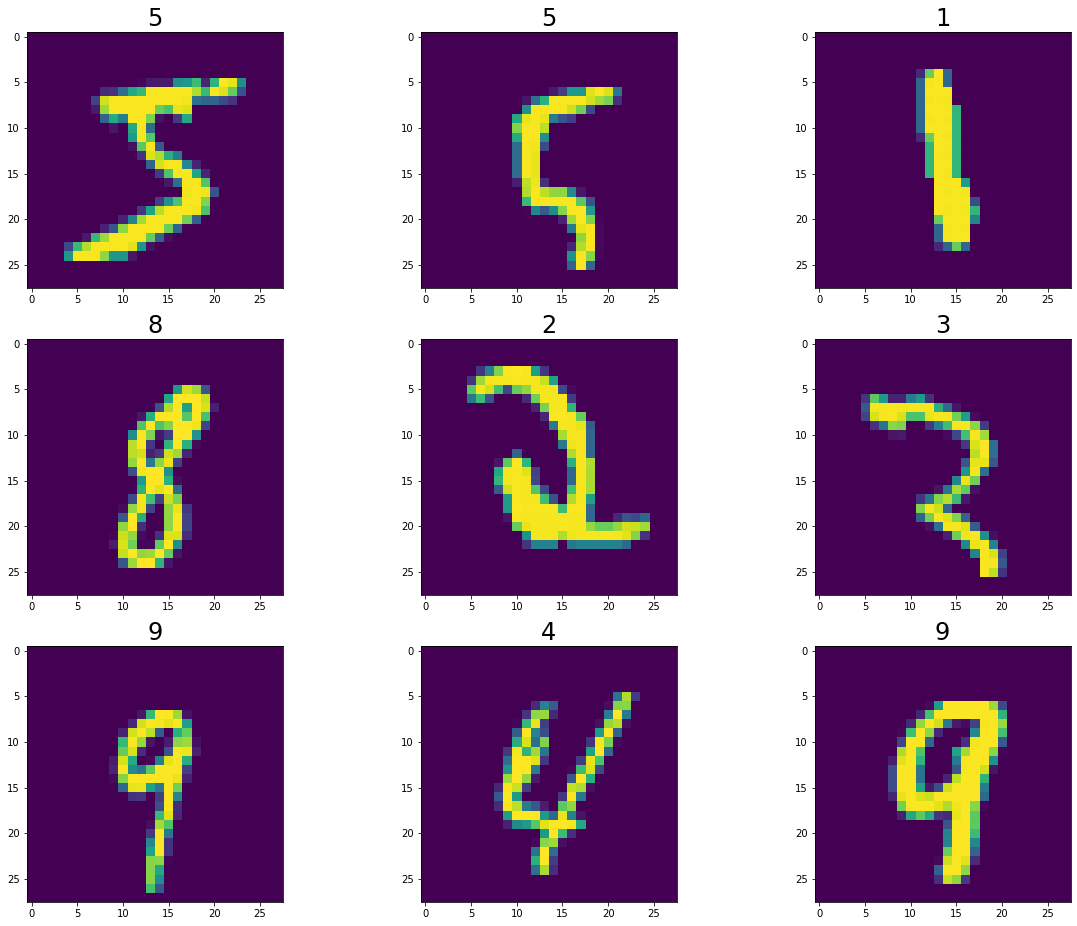

In [9]:
%pylab inline

fig = figure(0, (20, 16))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    imshow(X_train[i*100, :, :])
    title(str(round(Y_train[i*100], 3)), fontsize = 24)
    

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Adatok átalakítása, kilapítása, vektorrá alakítása

In [11]:
#X_train  60000 adat of 28x28-as felbontásban --> átalakítása 60000 x 784 alakzatra
RESHAPED = 784
#
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train[0,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

##Adatok normalizálása

In [13]:
#adatok normalizálása [0,1]
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [14]:
X_train[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##One-hot encoding

In [15]:
Y_test[0]

7

In [16]:
#one-hot kódolás
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [17]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## A modell felépítése

In [18]:
#model felépítése
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), name='dense_layer', activation='softmax'))

In [19]:
# A modell paramétereinek kiíratása 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
# A modell lefordítása
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#a modell képzése
history = model.fit(X_train, Y_train,
		batch_size=128, epochs=50,
		verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 4s 3ms/step - loss: 0.6712 - accuracy: 0.8336 - val_loss: 0.3815 - val_accuracy: 0.8999
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.9028 - val_loss: 0.3186 - val_accuracy: 0.9119
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.9119 - val_loss: 0.2967 - val_accuracy: 0.9178
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.9167 - val_loss: 0.2879 - val_accuracy: 0.9198
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2873 - accuracy: 0.9199 - val_loss: 0.2793 - val_accuracy: 0.9220
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2792 - accuracy: 0.9224 - val_loss: 0.2734 - val_accuracy: 0.9253
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2735 - accuracy: 0.9239 - val_loss: 0.2707 - val_accuracy: 0.9247
Epoch 

##A loss függvény alakulása

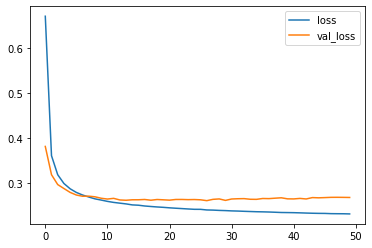

In [22]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot();

#Feladat készítsünk teljesn új hálózatot a fenti problémára, amely rendelkezik rejtett rétegekkel is!